### **Importing libraries**

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

### **Loading the dataset**

In [203]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Dataset Exploration & EDA**

In [204]:
df.shape

(1460, 81)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [206]:
def printUniqueValues(df) :
    for col in df.select_dtypes(include = 'object').columns :
        print('Unique values for',col)
        print(df[col].unique())
        print()

In [207]:
print(printUniqueValues(df))

Unique values for MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values for Street
['Pave' 'Grvl']

Unique values for Alley
[nan 'Grvl' 'Pave']

Unique values for LotShape
['Reg' 'IR1' 'IR2' 'IR3']

Unique values for LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Unique values for Utilities
['AllPub' 'NoSeWa']

Unique values for LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique values for LandSlope
['Gtl' 'Mod' 'Sev']

Unique values for Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique values for Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique values for Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Unique values for BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Unique values for HouseStyle
['2St

In [208]:
ncount = df.isnull().sum()
null_count = ncount[ncount > 0].to_dict()
print(null_count)

{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 872, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


In [209]:
def visualizeNullCount(null_count):
    null_count_df = pd.DataFrame({'Column' : null_count.keys(), 'Null Count' : null_count.values()})
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Column', y='Null Count', data=null_count_df)
    plt.xticks(rotation=90)
    plt.title('Null Count per Column')
    plt.xlabel('Column Name')
    plt.ylabel('Number of Null Values')
    plt.show()

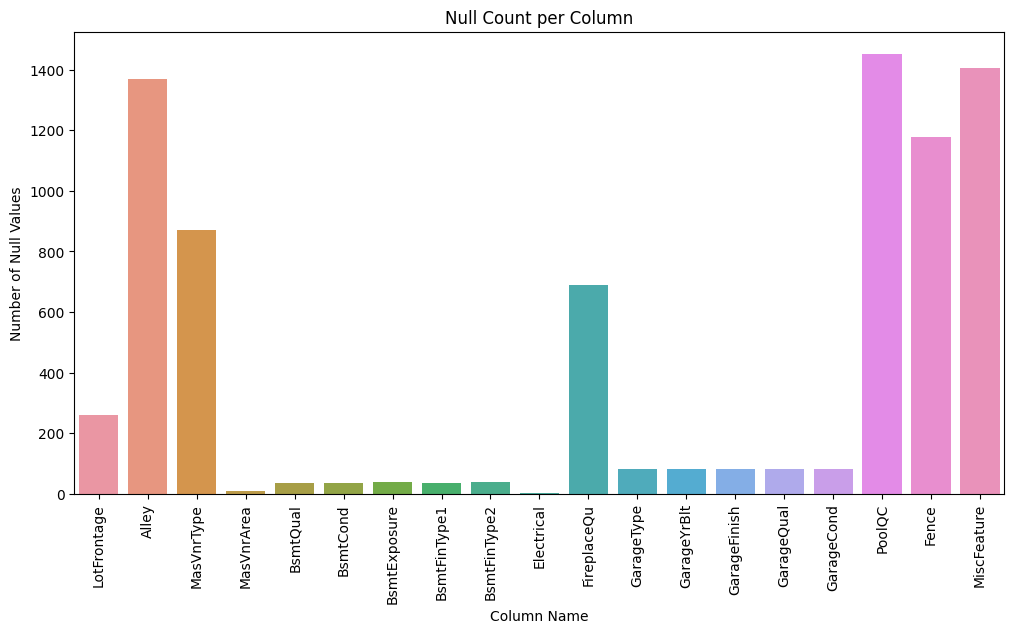

In [210]:
visualizeNullCount(null_count)

#### Removing the irrelevant columns

In [211]:
cols = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop(columns = cols, axis = 1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


#### Extracting the null columns and visualizing their count

In [212]:
ncount = df.isnull().sum()
null_count = ncount[ncount > 0].to_dict()
print(null_count)

{'LotFrontage': 259, 'MasVnrType': 872, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81}


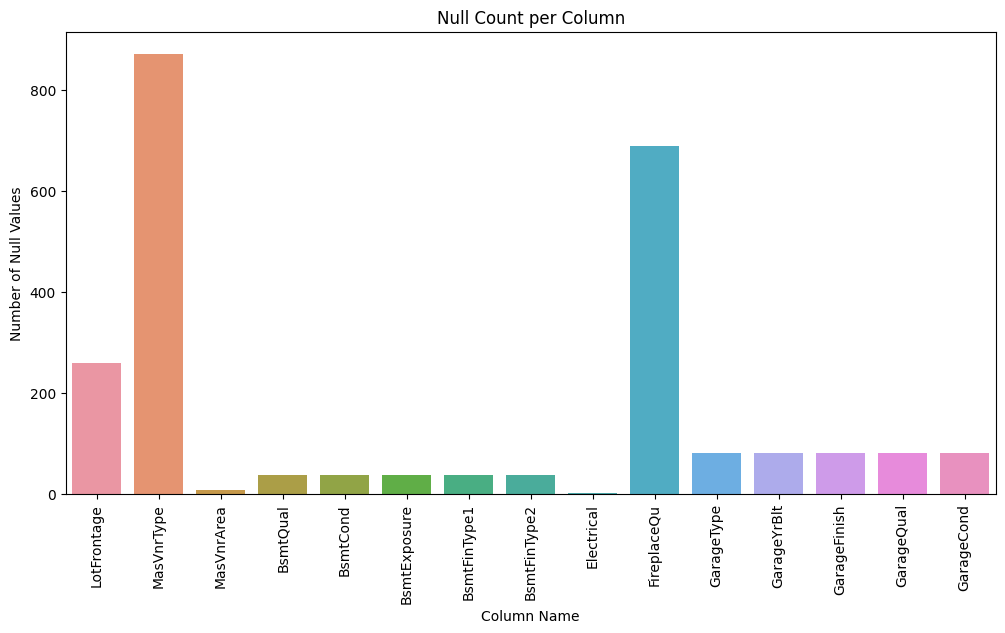

In [213]:
visualizeNullCount(null_count)

#### Extracting the categorical features

In [214]:
def getObjectFeaturesWithNulls(df):
  object_cols = df.select_dtypes(include=['object'])

  null_cols = object_cols.columns[object_cols.isnull().any()]

  return null_cols

null_object_features = getObjectFeaturesWithNulls(df)
print(null_object_features)

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


#### Extracting the numerical features

In [215]:
def getNumericalFeaturesWithNulls(df):
    num_features = df.select_dtypes(include = ['int64', 'float64'])
    null_cols = num_features.columns[num_features.isnull().any()]
    return null_cols

null_num_features = getNumericalFeaturesWithNulls(df)
print(null_num_features)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


#### Filling the missing data data in categorical columns

In [216]:
for col in null_object_features:
    if (col == 'Electrical'):
        df[col].fillna('Mixed', inplace = True)
    else:
        df[col].fillna('None', inplace = True)

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\617271447.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\617271447.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

#### Filling the missing data in numerical columns with corresponding median

In [217]:
for col in null_num_features:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace = True)

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\1741860230.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\1741860230.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

#### Checking null count

In [218]:
ncount = df.isnull().sum()
null_count = ncount[ncount > 0].to_dict()
print(null_count)

{}


In [219]:
df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

<Axes: >

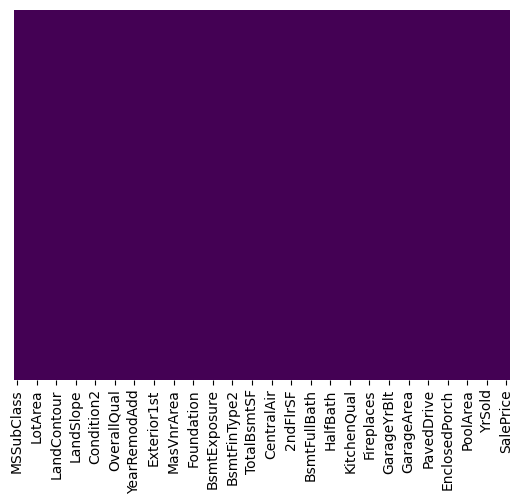

In [220]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


### **Encoding the categorical features**

In [222]:
df['MasVnrType'].replace(to_replace = ['BrkCmn', 'BrkFace', 'CBlock', 'Stone', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
df['BsmtQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
df['BsmtCond'].replace(to_replace = ['Gd', 'TA', 'Fa', 'Po', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
df['BsmtExposure'].replace(to_replace = ['Gd', 'Av', 'Mn', 'No', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
df['BsmtFinType1'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
df['BsmtFinType2'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
df['Electrical'].replace(to_replace = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mixed', 'Mix'], value = [4, 3, 2, 1, 0, 0], inplace = True)
df['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
df['GarageType'].replace(to_replace = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
df['GarageFinish'].replace(to_replace = ['Fin', 'RFn', 'Unf', 'None'], value = [3, 2, 1, 0], inplace = True)
df['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
df['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\820760642.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\820760642.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\820760642.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [224]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### **Finding the correlation of each column with target feature 'SalePrice' and extracting those columns which have correlation higher than 0.5**

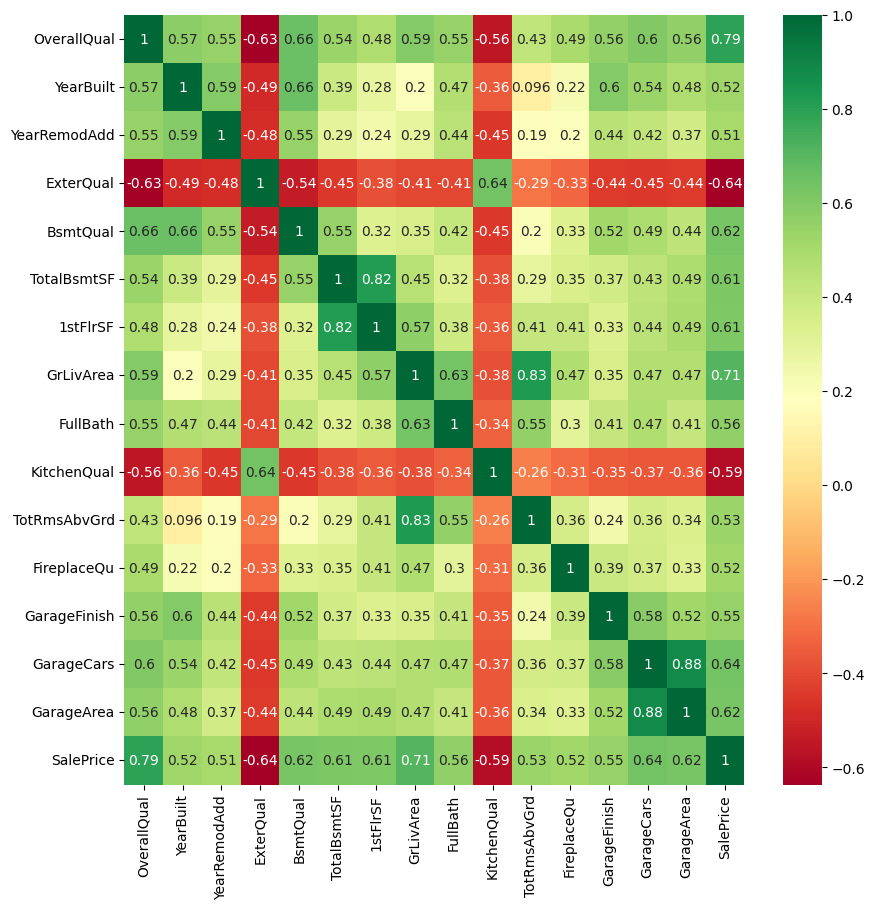

In [269]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [270]:
x = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'YearRemodAdd']]
y = df['SalePrice']

### **Checking for outliers in the extracted columns**

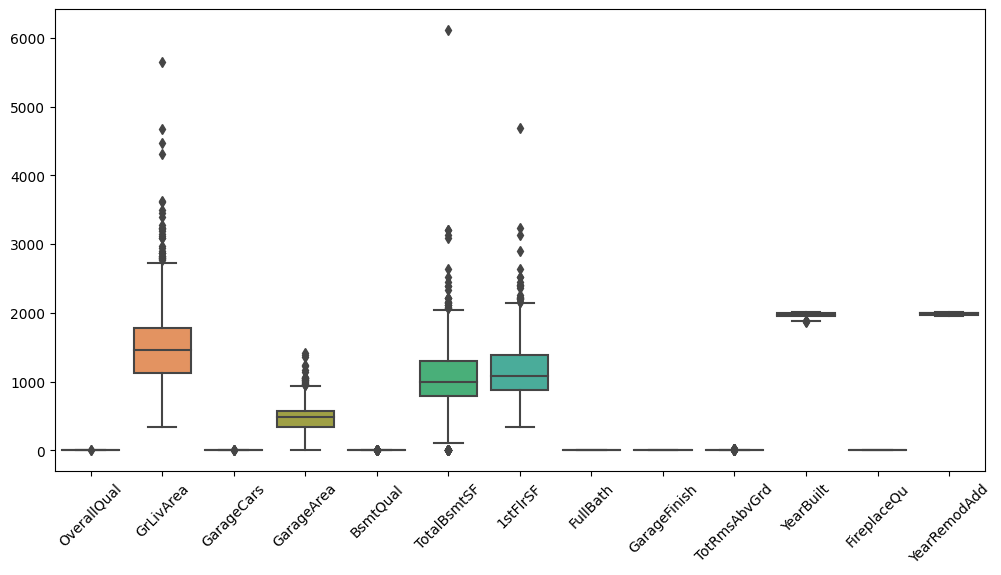

In [271]:
plt.figure(figsize = (12,6))
sns.boxplot(data = x)
plt.xticks(rotation=45)
plt.show()

#### Replacing the outliers with corresponding threshold values

In [272]:
def outlierThreshold(df, col, q1 = 0.25, q3 = 0.75):
    quantile1 = df[col].quantile(q1)
    quantile3 = df[col].quantile(q3)
    iqr = quantile3 - quantile1
    low_limit = quantile1 - (1.5 * iqr)
    upper_limit = quantile3 + (1.5 * iqr)
    return low_limit, upper_limit

In [273]:
def replaceWithThreshold(df, col):
    low_limit, upper_limit = outlierThreshold(df, col)
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > upper_limit), col] = upper_limit

In [274]:
for col in x.columns:
    replaceWithThreshold(x,col)

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\2535146512.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '158.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\2535146512.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\2535146512.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-27.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\aroy2\AppData\Local\Temp\ipykernel_9764\2535146512.py:3: FutureWarning:

Setting an item of incompatible dtype is de

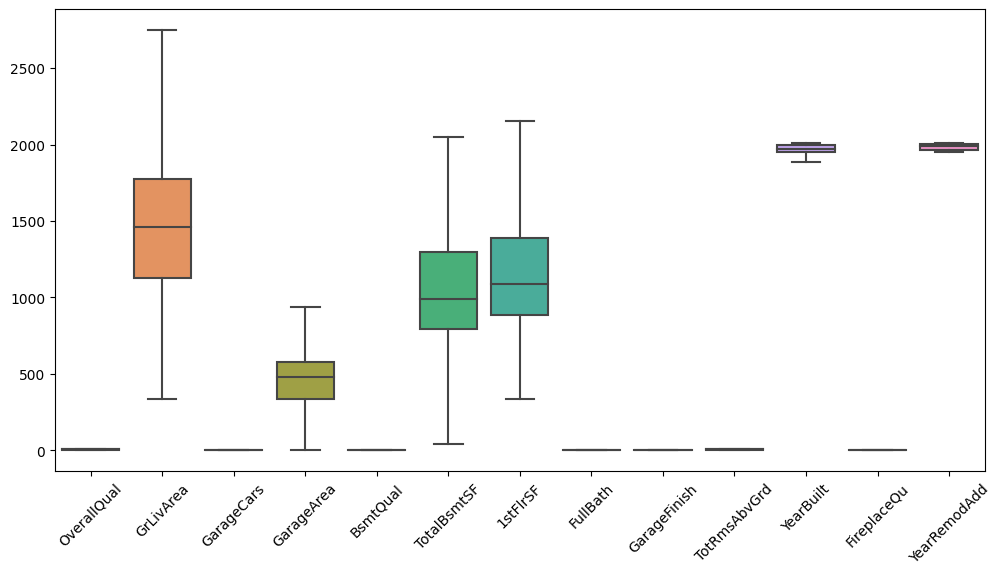

In [275]:
plt.figure(figsize = (12,6))
sns.boxplot(data = x)
plt.xticks(rotation=45)
plt.show()

### **Scaling the input feature between 0 and 1**

In [276]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)

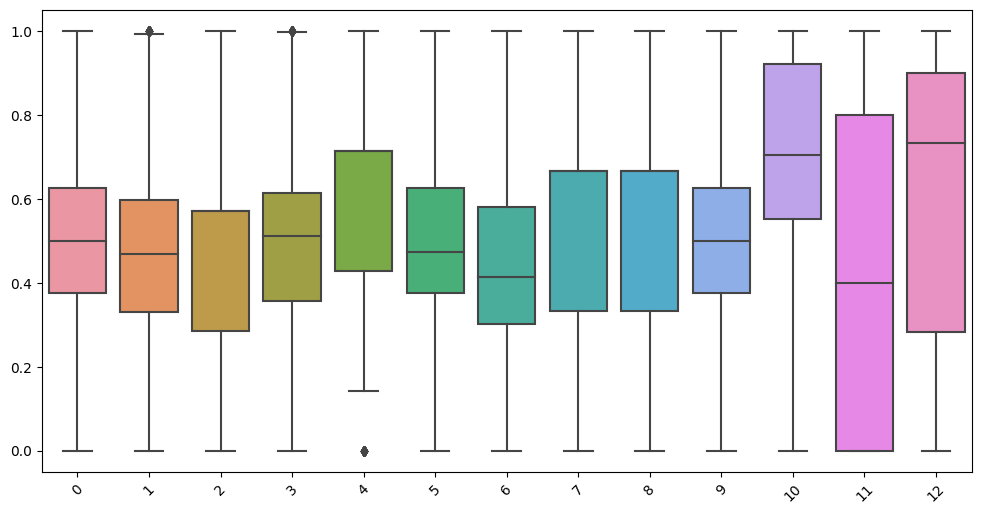

In [277]:
plt.figure(figsize = (12,6))
sns.boxplot(data = x_scaled)
plt.xticks(rotation=45)
plt.show()

### **Splitting the dataset into train and test**

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

### **Linear Regression**

In [279]:
lr = LinearRegression()

In [280]:
lr.fit(x_train,y_train)

LinearRegression()

In [281]:
y_pred_lr = lr.predict(x_test)

Text(0, 0.5, 'Predicted Values')

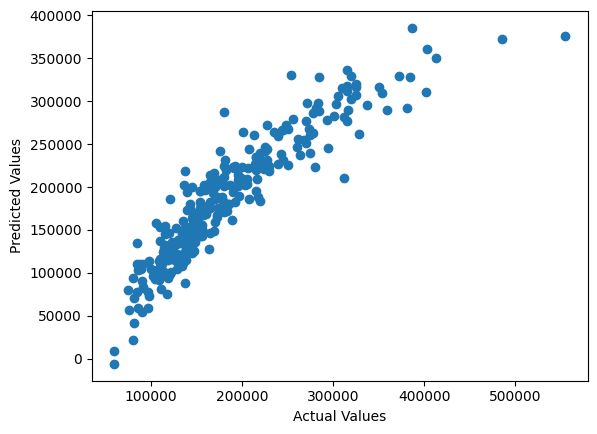

In [282]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#### Checking the performance of Linear Regression model in terms of MAE, MSE and R2 Score

In [283]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [284]:
result_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [285]:
print(result_lr)
print(mae_lr)
print(mse_lr)

0.8435543093952518
22048.49588184615
943735917.3827024


### **Ridge Regression**

In [286]:
ridge = Ridge()
params = {'alpha' : [1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 40, 45, 50, 100]}
rr = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
rr.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 40, 45, 50, 100]},
             scoring='neg_mean_squared_error')

In [287]:
print(rr.best_params_)
print(rr.best_score_)

{'alpha': 1}
-1353577678.373815


In [288]:
rr = Ridge(alpha = 1)
rr.fit(x_train,y_train)

Ridge(alpha=1)

In [289]:
y_pred_rr = rr.predict(x_test)

#### Checking the performance of Ridge Regression in terms of MAE, MSE and R2 Score

In [290]:
r2_rr = r2_score(y_test, y_pred_rr)
mae_rr = mean_absolute_error(y_test,y_pred_rr)
mse_rr = mean_squared_error(y_test, y_pred_rr)

In [291]:
print(r2_rr)
print(mae_rr)
print(mse_rr)

0.8426015770007225
22005.34228562845
949483137.2447244


### **Lasso Regression**

In [292]:
lasso = Lasso()
params = {'alpha' : [1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 40, 45, 50, 100]}
lassor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lassor.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 40, 45, 50, 100]},
             scoring='neg_mean_squared_error')

In [293]:
print(lassor.best_params_)
print(lassor.best_score_)

{'alpha': 50}
-1350716047.8869438


In [295]:
lassor = Lasso(alpha = 50)
lassor.fit(x_train,y_train)

Lasso(alpha=50)

In [296]:
y_pred_lassor = lassor.predict(x_test)

#### Checking the performance of Lasso Regression in terms of MAE, MSE and R2 Score

In [297]:
r2_lassor = r2_score(y_test, y_pred_lassor)
mae_lassor = mean_absolute_error(y_test,y_pred_lassor)
mse_lassor = mean_squared_error(y_test, y_pred_lassor)

In [298]:
print(r2_lassor)
print(mae_lassor)
print(mse_lassor)

0.842862172067551
22037.455811457152
947911135.3346161


### **Random Forest Regressor**

In [299]:
rf = RandomForestRegressor(n_estimators=100)

In [300]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [301]:
y_pred_rf = rf.predict(x_test)

#### Checking the performance of Random Forest in terms of MAE, MSE and R2 Score

In [302]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [303]:
print(r2_rf)
print(mae_rf)
print(mse_rf)

0.8801552123176165
18815.005573874754
722946283.849487


### **ElasticNet**

In [304]:
enet = ElasticNet()
params = {'alpha' : [1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 40, 45, 50, 100]}
enet = GridSearchCV(enet, params, scoring = 'neg_mean_squared_error', cv = 5)
enet.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 40, 45, 50, 100]},
             scoring='neg_mean_squared_error')

In [305]:
print(enet.best_params_)
print(enet.best_score_)

{'alpha': 0.001}
-1353418580.3935995


In [306]:
enet = ElasticNet(alpha = 0.001, l1_ratio = 0.9)
enet.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.9)

In [307]:
y_pred_enet = enet.predict(x_test)

#### Checking the performance of ElasticNet in terms of MAE, MSE and R2 Score

In [308]:
r2_enet = r2_score(y_test, y_pred_enet)
mae_enet = mean_absolute_error(y_test,y_pred_enet)
mse_enet = mean_squared_error(y_test, y_pred_enet)

In [309]:
print(r2_enet)
print(mae_enet)
print(mse_enet)

0.8434663625264873
22042.176619349968
944266444.1012942
